In [1]:
# This DEMO is plot a 3D velocity model of West Texas using the plot3d functions available in both pyseistr and pyekfmm
# 
#  COPYRIGHT: Yangkang Chen, 2024, The University of Texas at Austin
#
# Please download data from https://github.com/aaspip/data/blob/main/PB3D_Vp.csv


In [2]:
def asciiread(fname):
	'''
	fname: file name
	din:   a list of lines
	withnewline: if with the newline symbol '\n': True: with; False: without
	
	Example:
	
	import os
	
	lines=asciiread(os.getenv('HOME')+'/chenyk.data2/various/cyksmall/texnet_stations_2022_1019.csv');
	'''
	
	f=open(fname,'r')
	lines=f.readlines()
	lines=[ii.strip() for ii in lines]
	
	return lines

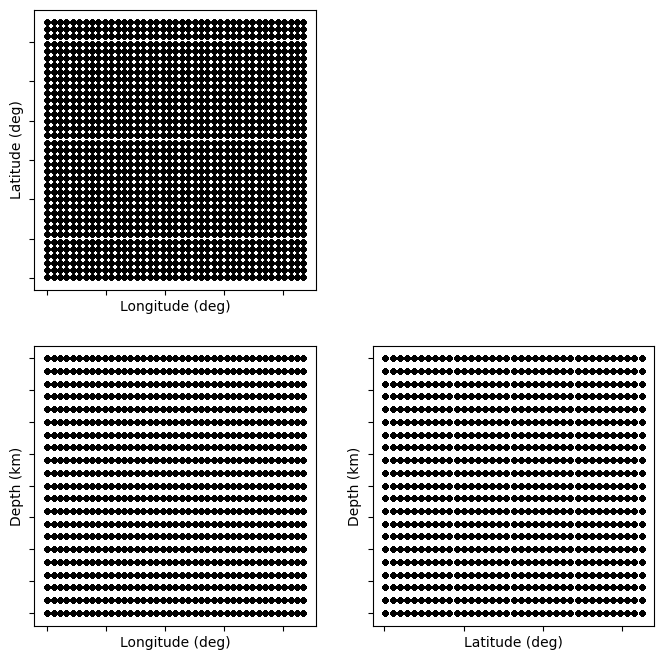

In [3]:
import matplotlib.pyplot as plt

from pylib.io import asciiread
import os
file='PB3D_Vp.csv' #https://github.com/aaspip/data/blob/main/PB3D_Vp.csv

lines=asciiread(file);
line1=lines[0]
lines=lines[1:]

lons=[float(ii.split(",")[0])  for ii in lines]
lats=[float(ii.split(",")[1])  for ii in lines]
deps=[float(ii.split(",")[2])  for ii in lines]
vps=[float(ii.split(",")[3])  for ii in lines]

## plot a grid figure
fig = plt.figure(figsize=(8, 8))
plt.subplot(221)
plt.plot(lons,lats,'k.');
plt.setp(plt.gca().get_xticklabels(), visible=False)
plt.setp(plt.gca().get_yticklabels(), visible=False)
plt.xlabel('Longitude (deg)');plt.ylabel('Latitude (deg)');

plt.subplot(223)
plt.plot(lons,deps,'k.');
plt.setp(plt.gca().get_xticklabels(), visible=False)
plt.setp(plt.gca().get_yticklabels(), visible=False)
plt.xlabel('Longitude (deg)');plt.ylabel('Depth (km)');

plt.subplot(224)
plt.plot(lats,deps,'k.');
plt.setp(plt.gca().get_xticklabels(), visible=False)
plt.setp(plt.gca().get_yticklabels(), visible=False)
plt.xlabel('Latitude (deg)');plt.ylabel('Depth (km)');
plt.savefig('xyzdata_1.png')
plt.show()






In [4]:
# plot the 3D

import numpy as np

##
from scipy.interpolate import griddata as gd
# generate new grid
ox=min(lons)
mx=max(lons)
nx=41

oy=min(lats)
my=max(lats)
ny=37

oz=min(deps)
mz=max(deps)
nz=21

x=np.linspace(ox,mx,nx)
y=np.linspace(oy,my,ny)
z=np.linspace(oz,mz,nz)

# X, Y, Z=np.mgrid[0:1:10j, 0:1:10j, 0:1:10j]
X, Y, Z=np.meshgrid(x,y,z)

# interpolate "data.v" on new grid "inter_mesh"
# V = gd((lons,lats,deps), vps, (X.flatten(),Y.flatten(),Z.flatten()), method='nearest')


V = gd((lons,lats,deps), vps, (X,Y,Z), method='nearest')

V=np.transpose(V, (2, 1, 0)) #to Z,X,Y dimensions


    



/Users/chenyk/aaspip.pyseistr/pyseistr/plot.py:91: UserWarning: The following kwargs were not used by contour: 'barlabel'
  _ = ax.contourf(
/Users/chenyk/aaspip.pyseistr/pyseistr/plot.py:96: UserWarning: The following kwargs were not used by contour: 'barlabel'
  _ = ax.contourf(
/Users/chenyk/aaspip.pyseistr/pyseistr/plot.py:101: UserWarning: The following kwargs were not used by contour: 'barlabel'
  C = ax.contourf(


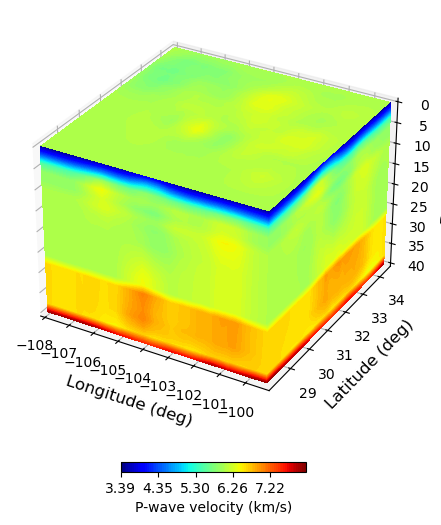

In [5]:
from pyseistr import plot3d
plot3d(V,z=z,x=x,y=y,cmap=plt.cm.jet,barlabel='P-wave velocity (km/s)',showf=False,close=False);

plt.gca().set_xlabel("Longitude (deg)",fontsize='large', fontweight='normal')
plt.gca().set_ylabel("Latitude (deg)",fontsize='large', fontweight='normal')
plt.gca().set_zlabel("Depth (km)",fontsize='large', fontweight='normal')
plt.savefig('xyzdata_2.png')
plt.show()